In [110]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import shapely.wkt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# display floats up to two decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# set up matplotlib to work interactively.
%matplotlib inline

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

In [111]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [112]:
%watermark -v -p pandas,numpy,seaborn,geopandas,shapely.wkt,matplotlib.pyplot

CPython 3.7.1
IPython 7.20.0

pandas 1.2.1
numpy 1.19.2
seaborn 0.11.1
geopandas 0.8.1
shapely.wkt 1.7.1
matplotlib.pyplot 3.3.2


Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Reading and Writing Files

## 2.1 Reading Spatial Data

In [113]:
%ls

README.md                      examples.ipynb
bldgs_before_1900.csv          mybinder_data_wrangling.ipynb


In [114]:
# saving neighborhood tabulation areas (nta) file link as 'url'
bldgs_before_1990 = pd.read_csv('bldgs_before_1900.csv') # Reading in GeoJSON

# returning first five rows 
bldgs_before_1990.head()

,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,5065718,1899.00,NaN,MULTIPOLYGON (((-74.14983332006722 40.55011975...,08/22/2017 12:00:00 AM +0000,Constructed,290792,28.68,2100.00,73.00,1588.78,184.78,5051430040.00,5051430040.00,Photogramm
1,3417314,1899.00,NaN,MULTIPOLYGON (((-73.96239465160933 40.64332930...,08/17/2017 12:00:00 AM +0000,Constructed,1191341,13.46,5110.00,34.00,400.92,80.20,3051480051.00,3051480051.00,Photogramm
2,3321949,1899.00,NaN,MULTIPOLYGON (((-73.96377343893835 40.68434962...,08/17/2017 12:00:00 AM +0000,Constructed,78119,10.27,5110.00,70.00,357.47,76.02,3019800026.00,3019800026.00,Photogramm
3,1045196,1899.00,NaN,MULTIPOLYGON (((-73.95541518712452 40.77167243...,08/22/2017 12:00:00 AM +0000,Constructed,562430,50.12,2100.00,39.00,1065.36,152.64,1014510146.00,1014510146.00,Photogramm
4,3062926,1899.00,NaN,MULTIPOLYGON (((-73.9630909105247 40.714212277...,08/22/2017 12:00:00 AM +0000,Constructed,663480,35.57,2100.00,50.00,784.78,116.16,3024050006.00,3024050006.00,Photogramm


In [115]:
# printing the dimentions (i.e. rows, columns) of the data
bldgs_before_1990.shape

(42703, 15)

In [116]:
rows = f'{bldgs_before_1990.shape[0]:,}'
columns = bldgs_before_1990.shape[1]

print('This dataset has {} rows and {} columns.'.format(rows, columns))

This dataset has 42,703 rows and 15 columns.


# 3. Data Inspection

## 3.1 Previewing Data

In [117]:
# previewing the first five rows of our dataframe
bldgs_before_1990.head()

,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,5065718,1899.00,NaN,MULTIPOLYGON (((-74.14983332006722 40.55011975...,08/22/2017 12:00:00 AM +0000,Constructed,290792,28.68,2100.00,73.00,1588.78,184.78,5051430040.00,5051430040.00,Photogramm
1,3417314,1899.00,NaN,MULTIPOLYGON (((-73.96239465160933 40.64332930...,08/17/2017 12:00:00 AM +0000,Constructed,1191341,13.46,5110.00,34.00,400.92,80.20,3051480051.00,3051480051.00,Photogramm
2,3321949,1899.00,NaN,MULTIPOLYGON (((-73.96377343893835 40.68434962...,08/17/2017 12:00:00 AM +0000,Constructed,78119,10.27,5110.00,70.00,357.47,76.02,3019800026.00,3019800026.00,Photogramm
3,1045196,1899.00,NaN,MULTIPOLYGON (((-73.95541518712452 40.77167243...,08/22/2017 12:00:00 AM +0000,Constructed,562430,50.12,2100.00,39.00,1065.36,152.64,1014510146.00,1014510146.00,Photogramm
4,3062926,1899.00,NaN,MULTIPOLYGON (((-73.9630909105247 40.714212277...,08/22/2017 12:00:00 AM +0000,Constructed,663480,35.57,2100.00,50.00,784.78,116.16,3024050006.00,3024050006.00,Photogramm


In [118]:
# previewing the last five rows of our dataframe
bldgs_before_1990.tail()

,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
42698,1002218,1862.00,NaN,MULTIPOLYGON (((-74.00311989266258 40.71857453...,01/28/2020 12:00:00 AM +0000,Constructed,501297,76.06,2100.00,20.00,2282.92,228.27,1001930046.00,1001930046.00,Photogramm
42699,3045984,1899.00,NaN,MULTIPOLYGON (((-73.92553366837195 40.68549464...,12/30/2020 12:00:00 AM +0000,Constructed,588127,31.16,2100.00,52.00,896.78,138.84,3016580083.00,3016580083.00,Photogramm
42700,3045985,1899.00,NaN,MULTIPOLYGON (((-73.92554904286456 40.68558509...,12/30/2020 12:00:00 AM +0000,Constructed,348644,42.58,2100.00,52.00,1404.79,181.74,3016580084.00,3016580084.00,Photogramm
42701,3068516,1899.00,NaN,MULTIPOLYGON (((-73.95122922485241 40.71474060...,01/27/2021 12:00:00 AM +0000,Constructed,550012,38.98,2100.00,13.00,744.06,109.21,3027510051.00,3027510051.00,Photogramm
42702,3120376,1899.00,NaN,MULTIPOLYGON (((-73.95292442664085 40.63958900...,02/03/2021 12:00:00 AM +0000,Constructed,212080,38.64,2100.00,28.00,1821.13,190.72,3052120038.00,3052120038.00,Photogramm


In [119]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
bldgs_before_1990.shape

(42703, 15)

In [120]:
# the object's type
type(bldgs_before_1990)

pandas.core.frame.DataFrame

In [121]:
# printing the columns of our dataframe
bldgs_before_1990.columns

Index(['BIN', 'CNSTRCT_YR', 'NAME', 'the_geom', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE'],
      dtype='object')

In [122]:
# printing the data types of our columns
bldgs_before_1990.dtypes

BIN             int64
CNSTRCT_YR    float64
NAME           object
the_geom       object
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL      float64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [123]:
# printing the column names, non-null counts, and data types of our columns
bldgs_before_1990.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BIN         42703 non-null  int64  
 1   CNSTRCT_YR  42703 non-null  float64
 2   NAME        57 non-null     object 
 3   the_geom    42703 non-null  object 
 4   LSTMODDATE  42703 non-null  object 
 5   LSTSTATYPE  42703 non-null  object 
 6   DOITT_ID    42703 non-null  int64  
 7   HEIGHTROOF  42697 non-null  float64
 8   FEAT_CODE   42703 non-null  float64
 9   GROUNDELEV  42702 non-null  float64
 10  SHAPE_AREA  42703 non-null  float64
 11  SHAPE_LEN   42703 non-null  float64
 12  BASE_BBL    42703 non-null  float64
 13  MPLUTO_BBL  42703 non-null  float64
 14  GEOMSOURCE  42703 non-null  object 
dtypes: float64(8), int64(2), object(5)
memory usage: 4.9+ MB


In [124]:
# counts of unique values of our datatypes 
bldgs_before_1990.dtypes.value_counts()

float64    8
object     5
int64      2
dtype: int64

In [125]:
# printing True/False if column is unique on our unique key (DOITT_ID)
bldgs_before_1990['DOITT_ID'].is_unique

True

In [126]:
# printing descriptive statistics of our numeric columns in our data
bldgs_before_1990.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,42703.00,42703.00,42703.00,42697.00,42703.00,42702.00,42703.00,42703.00,42703.00,42703.00
mean,2730980.69,1888.20,461693.40,38.88,2282.25,58.25,1248.85,153.86,2686574805.35,2686574924.81
std,1083017.85,18.32,281431.52,16.05,717.97,34.46,1984.69,66.40,1067258429.65,1067258330.44
min,1000008.00,1652.00,5.00,3.40,1004.00,0.00,65.43,32.37,1000070027.00,1000070027.00
25%,2043399.00,1885.00,227658.50,30.45,2100.00,31.00,811.32,125.70,2038480018.00,2038480018.00
50%,3035315.00,1899.00,449568.00,37.32,2100.00,53.00,976.36,142.41,3012340067.00,3012340067.00
75%,3065016.50,1899.00,677111.00,44.50,2100.00,77.00,1235.25,167.57,3022260049.50,3022260052.00
max,5169977.00,1899.00,1293541.00,473.97,5110.00,340.00,136276.37,2533.97,5080460087.00,5080460087.00


In [127]:
bldgs_before_1990.describe(include=['O'])

,NAME,the_geom,LSTMODDATE,LSTSTATYPE,GEOMSOURCE
count,57,42703,42703,42703,42703
unique,54,42703,143,5,2
top,Kimball Block,MULTIPOLYGON (((-73.82046446276397 40.83723659...,08/22/2017 12:00:00 AM +0000,Constructed,Photogramm
freq,3,1,21629,42655,41751


## 3.3 Identifying Null/NA Values

In [128]:
# return a boolean same-sized object indicating if any of the values are NA
bldgs_before_1990.isnull().any()

BIN           False
CNSTRCT_YR    False
NAME           True
the_geom      False
LSTMODDATE    False
LSTSTATYPE    False
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE     False
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL      False
MPLUTO_BBL    False
GEOMSOURCE    False
dtype: bool

In [129]:
# printing the total amount of null/na values in our data
bldgs_before_1990.isnull().sum()

BIN               0
CNSTRCT_YR        0
NAME          42646
the_geom          0
LSTMODDATE        0
LSTSTATYPE        0
DOITT_ID          0
HEIGHTROOF        6
FEAT_CODE         0
GROUNDELEV        1
SHAPE_AREA        0
SHAPE_LEN         0
BASE_BBL          0
MPLUTO_BBL        0
GEOMSOURCE        0
dtype: int64

In [130]:
# printing the total amount of null/na values in our data
bldgs_before_1990.isnull().sum().sum()

42653

In [131]:
# return descriptive statistics of boolean indicating if any of the values are NA
bldgs_before_1990.isnull().any().describe()

count        15
unique        2
top       False
freq         12
dtype: object

In [132]:
# calculating a percentage of the number of nulls to total number of records of each column
missing_data = (bldgs_before_1990.isnull().sum() / len(bldgs_before_1990)) * 100

# creating a dataframe
missing_data = pd.DataFrame({'Missing Ratio (%)' :missing_data}) 
missing_data.sort_values(by='Missing Ratio (%)', ascending=True, inplace=True)
missing_data

,Missing Ratio (%)
BIN,0.00
CNSTRCT_YR,0.00
the_geom,0.00
LSTMODDATE,0.00
LSTSTATYPE,0.00
DOITT_ID,0.00
FEAT_CODE,0.00
SHAPE_AREA,0.00
SHAPE_LEN,0.00
BASE_BBL,0.00


<AxesSubplot:>

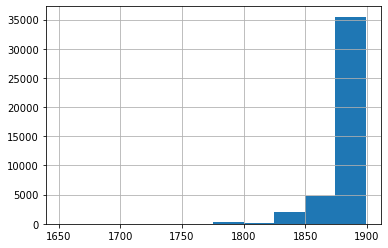

In [133]:
bldgs_before_1990['CNSTRCT_YR'].hist()

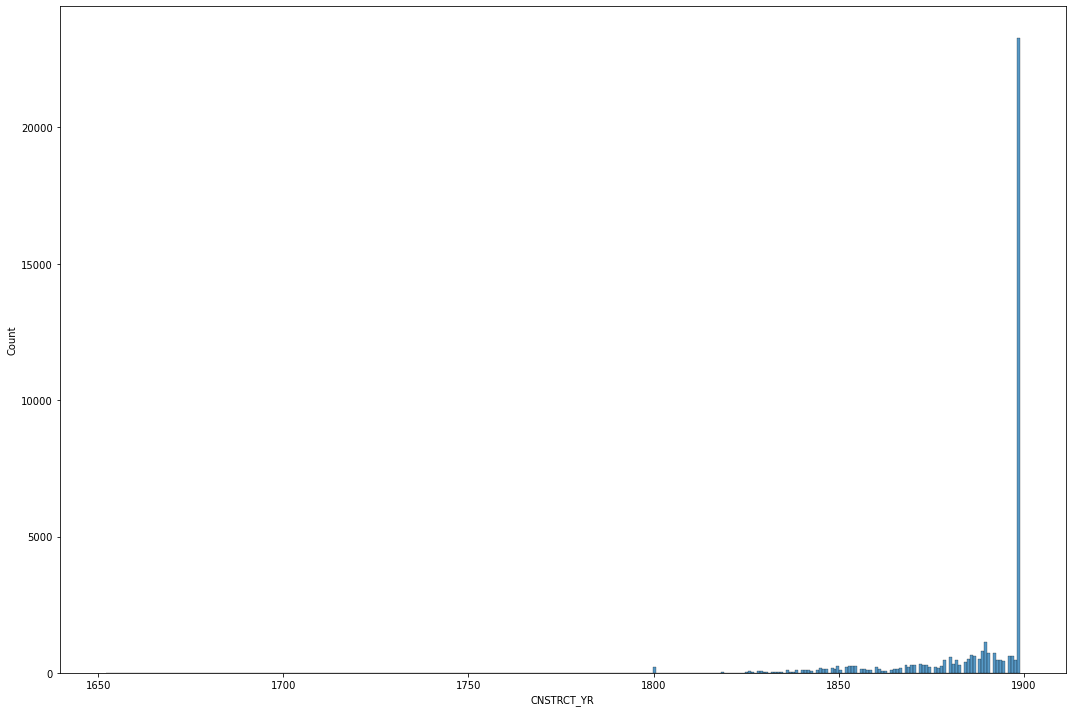

In [134]:
plt.figure(figsize=(15,10))

sns.histplot(bldgs_before_1990['CNSTRCT_YR'])

plt.tight_layout()

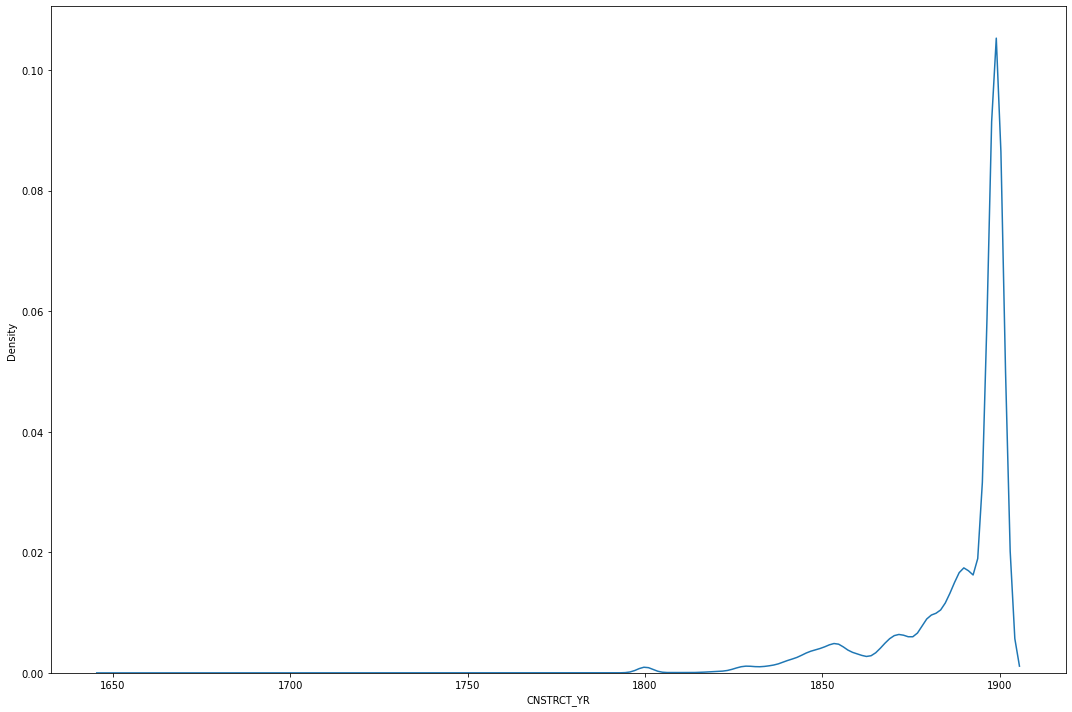

In [135]:
plt.figure(figsize=(15,10))

sns.kdeplot(bldgs_before_1990['CNSTRCT_YR'])

plt.tight_layout()

In [136]:
by_year = bldgs_before_1990.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

,CNSTRCT_YR,count
0,1652,1
1,1661,2
2,1665,1
3,1680,1
4,1690,1


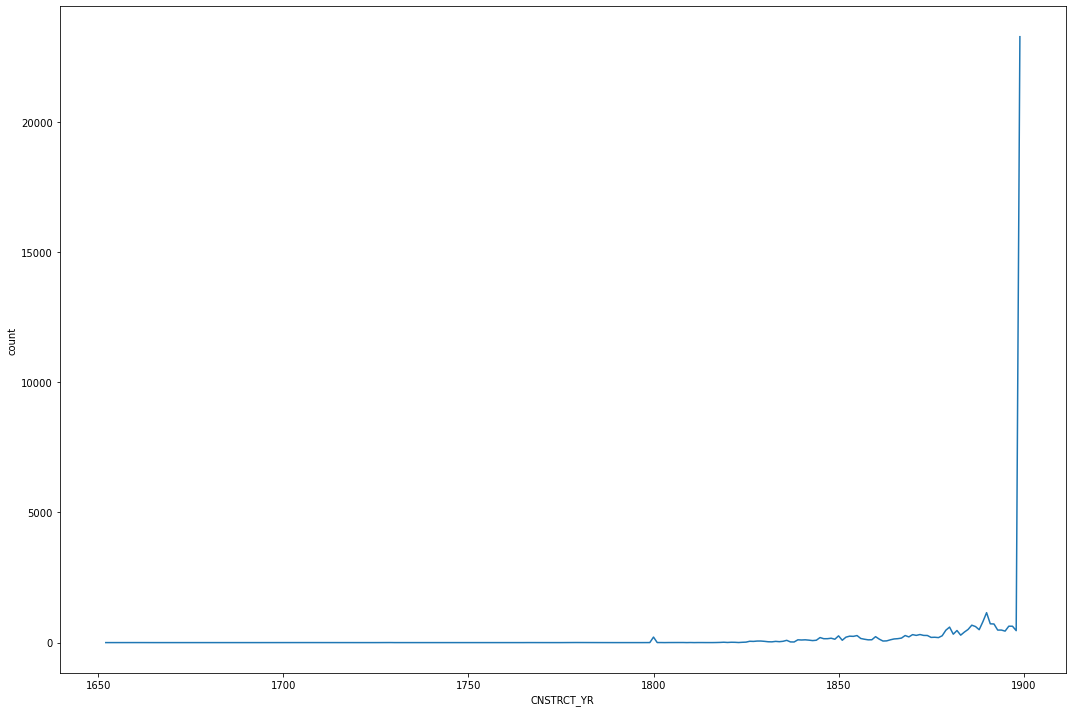

In [137]:
plt.figure(figsize=(15,10))

sns.lineplot(data=by_year, 
             x="CNSTRCT_YR", 
             y="count")

plt.tight_layout()

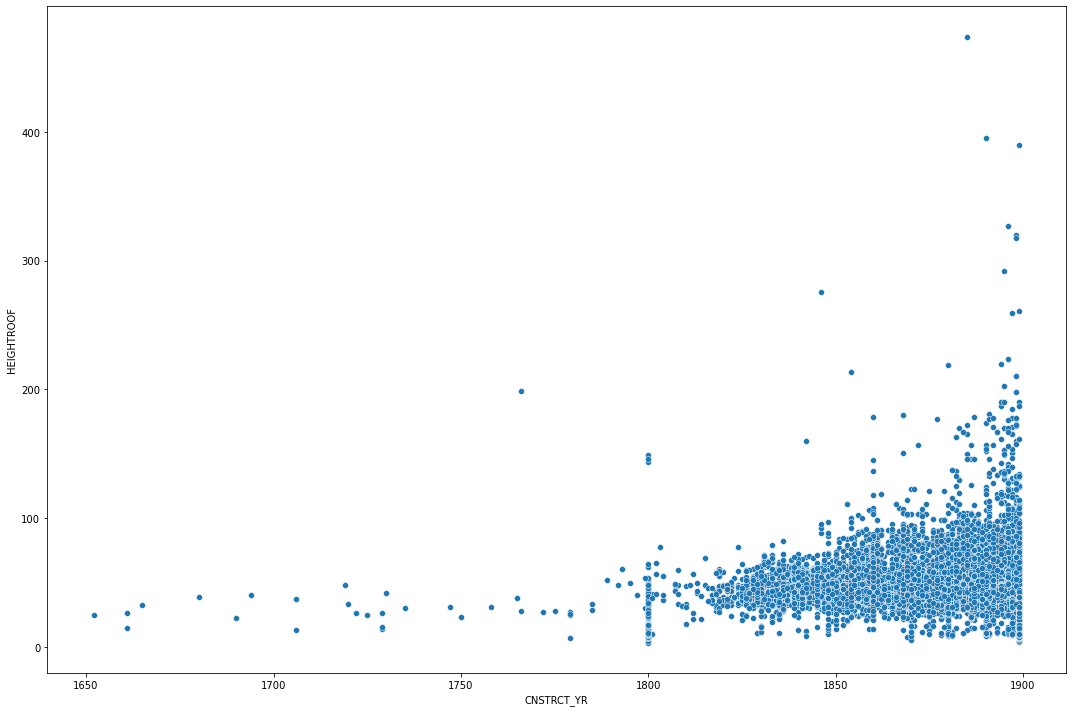

In [138]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=bldgs_before_1990['CNSTRCT_YR'],
                y=bldgs_before_1990['HEIGHTROOF'])

plt.tight_layout()

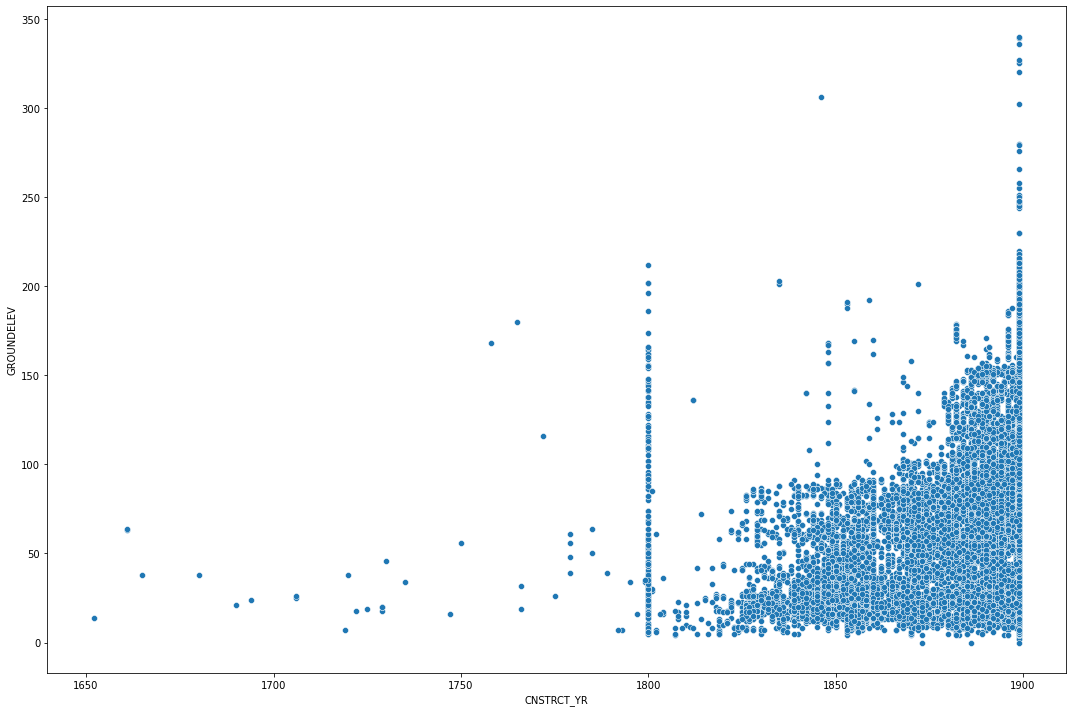

In [139]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=bldgs_before_1990['CNSTRCT_YR'],
                y=bldgs_before_1990['GROUNDELEV'])

plt.tight_layout()

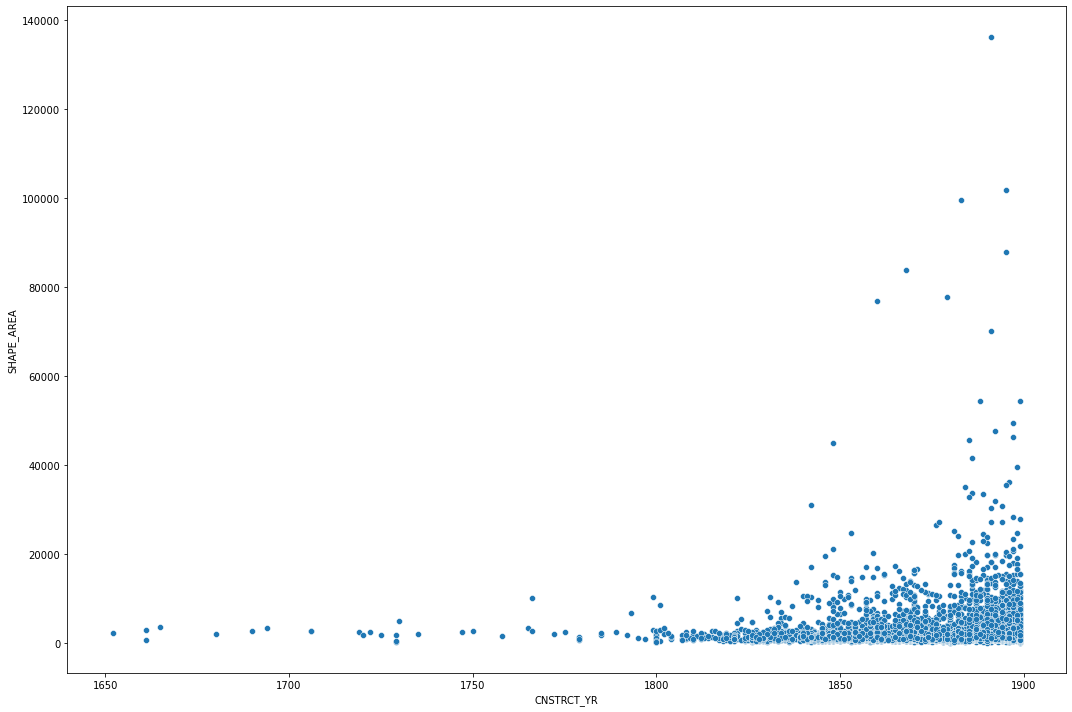

In [140]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=bldgs_before_1990['CNSTRCT_YR'],
                y=bldgs_before_1990['SHAPE_AREA'])

plt.tight_layout()

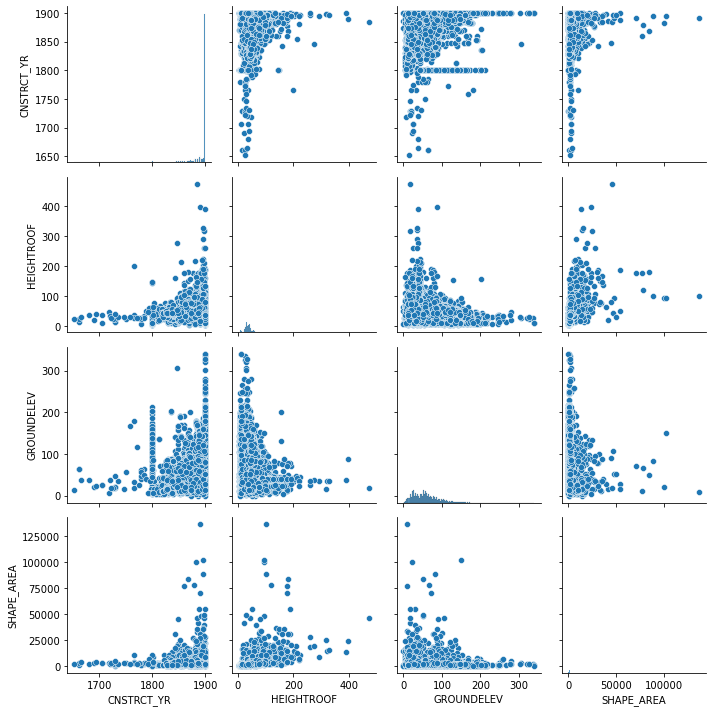

In [141]:
selected = bldgs_before_1990[['CNSTRCT_YR', 
                              'HEIGHTROOF', 
                              'GROUNDELEV', 
                              'SHAPE_AREA']]
sns.pairplot(selected)

plt.tight_layout()

In [142]:
boros = gpd.read_file(gpd.datasets.get_path('nybb'))

boros.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.01,1623819823.81,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.05,3045212795.20,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.52,1937478507.61,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.10,636471539.77,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.99,1186924686.49,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [143]:
boros.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [144]:
geometry = bldgs_before_1990['the_geom'].map(shapely.wkt.loads)

gdf = gpd.GeoDataFrame(bldgs_before_1990, crs="EPSG:4326", geometry=geometry)

In [145]:
gdf.head()

,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,geometry
0,5065718,1899.00,NaN,MULTIPOLYGON (((-74.14983332006722 40.55011975...,08/22/2017 12:00:00 AM +0000,Constructed,290792,28.68,2100.00,73.00,1588.78,184.78,5051430040.00,5051430040.00,Photogramm,"MULTIPOLYGON (((-74.14983 40.55012, -74.14991 ..."
1,3417314,1899.00,NaN,MULTIPOLYGON (((-73.96239465160933 40.64332930...,08/17/2017 12:00:00 AM +0000,Constructed,1191341,13.46,5110.00,34.00,400.92,80.20,3051480051.00,3051480051.00,Photogramm,"MULTIPOLYGON (((-73.96239 40.64333, -73.96246 ..."
2,3321949,1899.00,NaN,MULTIPOLYGON (((-73.96377343893835 40.68434962...,08/17/2017 12:00:00 AM +0000,Constructed,78119,10.27,5110.00,70.00,357.47,76.02,3019800026.00,3019800026.00,Photogramm,"MULTIPOLYGON (((-73.96377 40.68435, -73.96383 ..."
3,1045196,1899.00,NaN,MULTIPOLYGON (((-73.95541518712452 40.77167243...,08/22/2017 12:00:00 AM +0000,Constructed,562430,50.12,2100.00,39.00,1065.36,152.64,1014510146.00,1014510146.00,Photogramm,"MULTIPOLYGON (((-73.95542 40.77167, -73.95551 ..."
4,3062926,1899.00,NaN,MULTIPOLYGON (((-73.9630909105247 40.714212277...,08/22/2017 12:00:00 AM +0000,Constructed,663480,35.57,2100.00,50.00,784.78,116.16,3024050006.00,3024050006.00,Photogramm,"MULTIPOLYGON (((-73.96309 40.71421, -73.96312 ..."


In [146]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [147]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [148]:
gdf.to_crs(2263, inplace=True)

gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

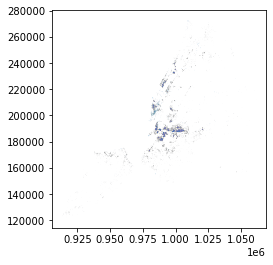

In [149]:
gdf.plot()

<AxesSubplot:>

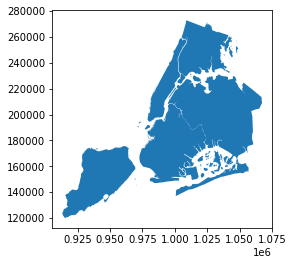

In [150]:
boros.plot()

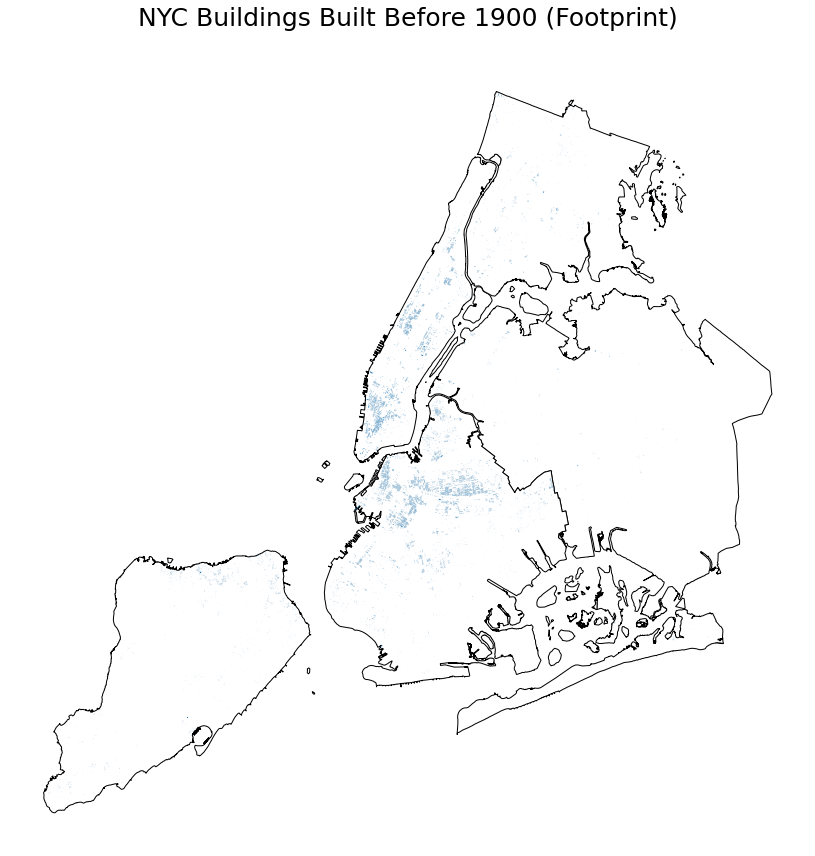

In [151]:
fig, ax = plt.subplots(figsize=(12,12))

boros.plot(ax=ax, 
           color='white', 
           edgecolor='black', 
           zorder=0) # the order they should be plotted

gdf.plot(ax=ax, 
         zorder=1)


ax.set_title('NYC Buildings Built Before 1900 (Footprint)', pad=30, fontsize=25)
ax.set_aspect('equal', 'box')
plt.axis('off')
fig.tight_layout()

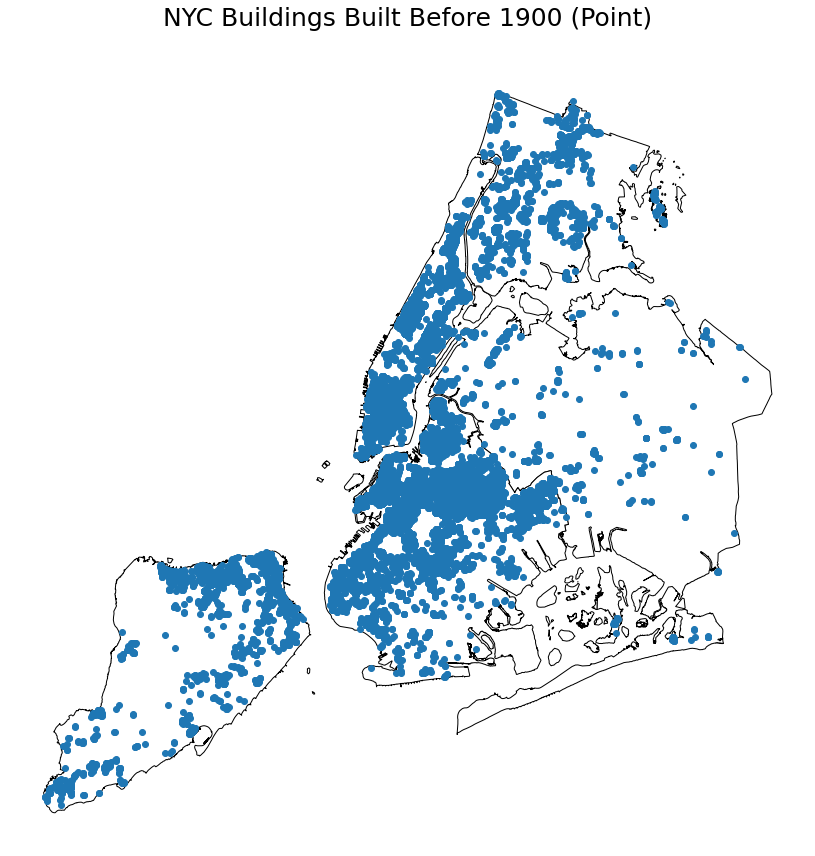

In [152]:
fig, ax = plt.subplots(figsize=(12,12))

boros.plot(ax=ax, 
           color='white', 
           edgecolor='black', 
           zorder=0) # the order they should be plotted

gdf.centroid.plot(ax=ax, 
                  zorder=1)


ax.set_title('NYC Buildings Built Before 1900 (Point)', pad=30, fontsize=25)
ax.set_aspect('equal', 'box')
plt.axis('off')
fig.tight_layout()

In [153]:
gdf.centroid

0         POINT (942591.129 139742.729)
1         POINT (994675.072 173669.763)
2         POINT (994287.337 188614.655)
3         POINT (996577.145 220400.125)
4         POINT (994460.854 199483.536)
                      ...              
42698     POINT (983414.437 201039.831)
42699    POINT (1004910.695 189048.799)
42700    POINT (1004888.381 189061.845)
42701     POINT (997758.037 199664.599)
42702     POINT (997303.063 172266.015)
Length: 42703, dtype: geometry

In [154]:
gdf.centroid.x

0        942591.13
1        994675.07
2        994287.34
3        996577.14
4        994460.85
           ...    
42698    983414.44
42699   1004910.70
42700   1004888.38
42701    997758.04
42702    997303.06
Length: 42703, dtype: float64

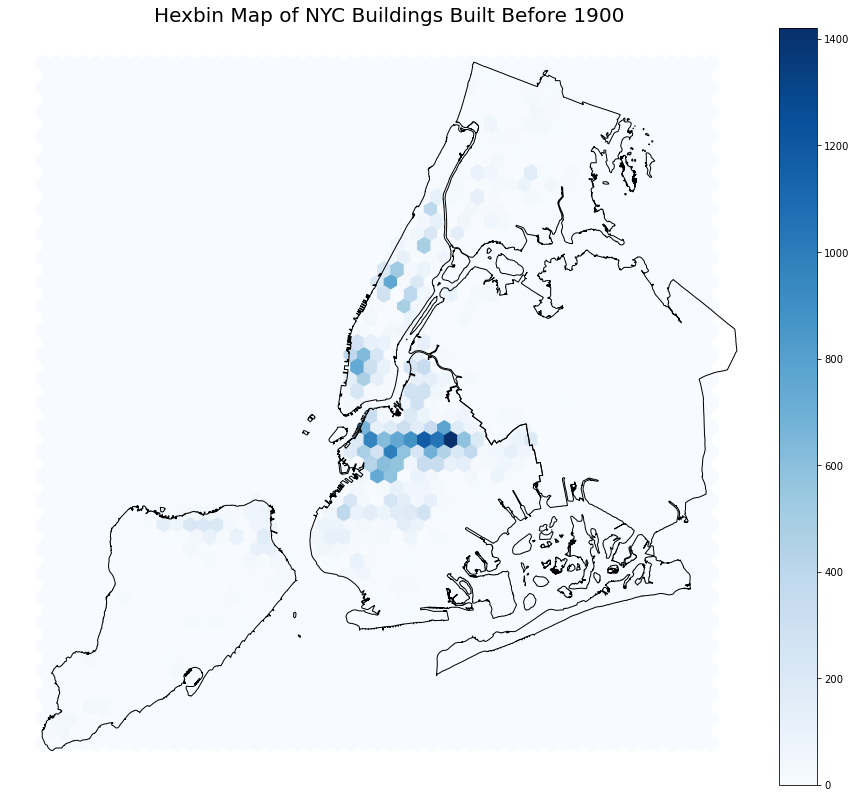

In [155]:
fig, ax = plt.subplots(figsize=(12, 12))

hb = ax.hexbin(gdf.centroid.x, 
               gdf.centroid.y, 
               gridsize=50, 
               cmap='Blues')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(hb, cax=cax)

boros.plot(ax=ax, 
           color='None', 
           edgecolor='black', 
           zorder=1)

ax.set_title("Hexbin Map of NYC Buildings Built Before 1900", fontsize=20)
ax.set_aspect('equal', 'box')
ax.axis('off')
plt.tight_layout()

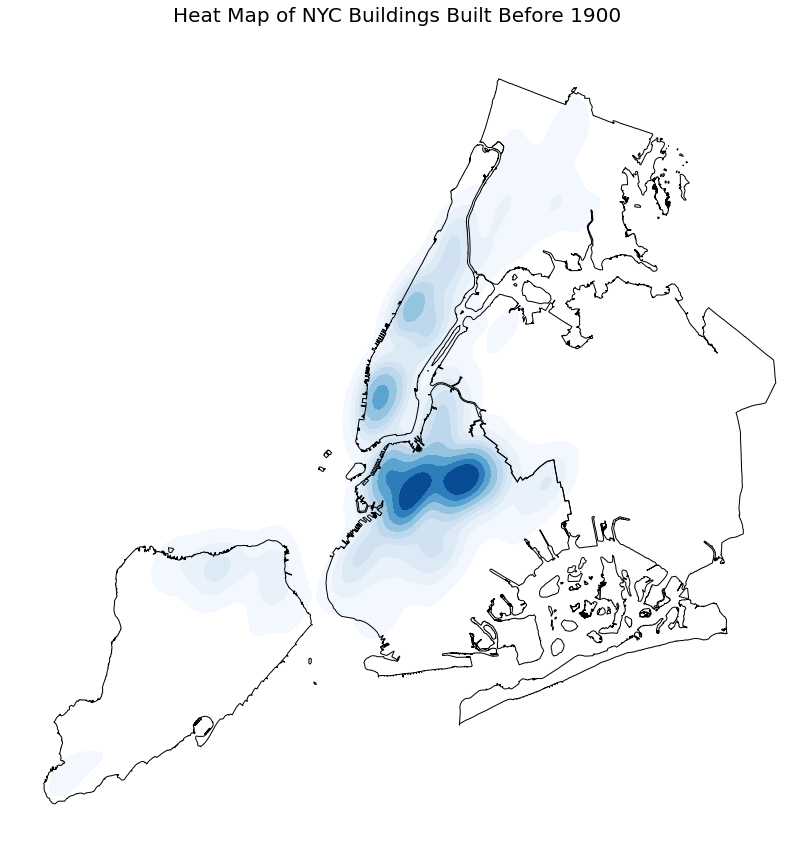

In [156]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.kdeplot(data=gdf,
            x=gdf.centroid.x,
            y=gdf.centroid.y,
            fill=True,
            cmap='Blues',
            ax=ax)

boros.plot(ax=ax, 
           color='None', 
           edgecolor='black', 
           zorder=1)

ax.set_title('Heat Map of NYC Buildings Built Before 1900', fontsize=20)
ax.set_aspect('equal', 'box')
ax.axis('off')
plt.tight_layout()